In [43]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import joblib
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes


In [44]:
df = pd.read_csv('census_ml.csv')
df.head(1)

,year,sample,serial,hhwt,cluster,perwt,nchild,nchild_under_5,nsibs,eldch,sex,age,birthyr,race,educ,ed_var_detailed,occ,occ1950,ed_group_h
0,1960,1960 5%,69847,20,1.960000e+12,20,0 children present,No children under age 5,0 siblings,NaN,Male,43,1916,White,"Grade 5, 6, 7, or 8",Grade 8,775,Operative and kindred workers (nec),1


In [45]:
df = df.drop(labels=['year','sample','serial','hhwt','cluster','perwt','nchild','nchild_under_5', 'nsibs', 'eldch', 'sex',
                    'age','birthyr','race', 'educ', 'ed_var_detailed','occ'], axis=1)


In [46]:
df['occ1950'] = np.where((df['occ1950'] == 'N/A (blank)'),
                           float('nan'), df['occ1950'])

df['occ1950'] = np.where((df['occ1950'] == 'Occupation missing/unknown'),
                           float('nan'), df['occ1950'])
df = df.dropna()

In [47]:
dummies =  pd.get_dummies(df.occ1950)

In [48]:
census = pd.concat([df, dummies], axis='columns')
census

,occ1950,ed_group_h,Accountants and auditors,Actors and actresses,Advertising agents and salesmen,Aeronautical-Engineers,Agents (nec),Agricultural sciences-Professors and instructors,Agricultural scientists,Airplane pilots and navigators,...,"Tinsmiths, coppersmiths, and sheet metal workers","Tool makers, and die makers and setters",Truck and tractor drivers,Upholsterers,"Ushers, recreation and amusement",Veterinarians,Waiters and waitresses,Watchmen (crossing) and bridge tenders,"Weavers, textile",Welders and flame cutters
0,Operative and kindred workers (nec),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Managers, officials, and proprietors (nec)",2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Foremen (nec),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Managers, officials, and proprietors (nec)",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Salesmen and sales clerks (nec),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203592,Foremen (nec),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203593,Clergymen,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203595,"Buyers and dept heads, store",2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203596,"Dispatchers and starters, vehicle",2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
census = census.drop(labels=['occ1950','Milliners' ], axis='columns')
census

,ed_group_h,Accountants and auditors,Actors and actresses,Advertising agents and salesmen,Aeronautical-Engineers,Agents (nec),Agricultural sciences-Professors and instructors,Agricultural scientists,Airplane pilots and navigators,Airplane-mechanics and repairmen,...,"Tinsmiths, coppersmiths, and sheet metal workers","Tool makers, and die makers and setters",Truck and tractor drivers,Upholsterers,"Ushers, recreation and amusement",Veterinarians,Waiters and waitresses,Watchmen (crossing) and bridge tenders,"Weavers, textile",Welders and flame cutters
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203592,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203593,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203595,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203596,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
census['ed_group_h'].unique()

array([1, 2, 4, 3], dtype=int64)

In [112]:
x = census.reset_index().values
x[2]

array([2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
km = KModes(n_clusters=4,init='Huang', n_init=5, verbose=2)


In [53]:
clusters = km.fit_predict(x)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 439034.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4965, cost: 393655.0
Run 2, iteration: 2/100, moves: 305, cost: 393655.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 13164, cost: 435342.0
Run 3, iteration: 2/100, moves: 0, cost: 435342.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 22178, cost: 385589.0
Run 4, iteration: 2/100, moves: 0, cost: 385589.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 54326, cost: 394537.0
Run 5, iteration: 2/100, moves: 4902, cost: 394537.0
Best run was number 4


In [54]:
census['clusters'] = clusters

In [55]:
from sklearn.decomposition import PCA
pca = PCA(2)
census.head(5)

,ed_group_h,Accountants and auditors,Actors and actresses,Advertising agents and salesmen,Aeronautical-Engineers,Agents (nec),Agricultural sciences-Professors and instructors,Agricultural scientists,Airplane pilots and navigators,Airplane-mechanics and repairmen,...,"Tool makers, and die makers and setters",Truck and tractor drivers,Upholsterers,"Ushers, recreation and amusement",Veterinarians,Waiters and waitresses,Watchmen (crossing) and bridge tenders,"Weavers, textile",Welders and flame cutters,clusters
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#Turn the modified census into two columns with PCA
plot_columns = pca.fit_transform(census.iloc[:,0:271])

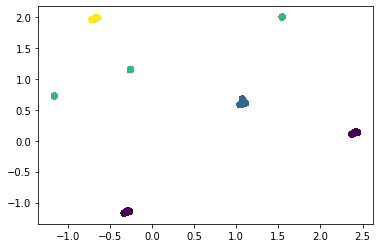

In [58]:
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=census["clusters"], s=30)
plt.show()

In [59]:
print(km.cluster_centroids_)

[[ 0  1  0 ...  0  0  0]
 [17  3  0 ...  0  0  0]
 [ 1  1  0 ...  0  0  0]
 [ 5  2  0 ...  0  0  0]]


In [60]:
census[census['clusters'] == 1].head(25)

,ed_group_h,Accountants and auditors,Actors and actresses,Advertising agents and salesmen,Aeronautical-Engineers,Agents (nec),Agricultural sciences-Professors and instructors,Agricultural scientists,Airplane pilots and navigators,Airplane-mechanics and repairmen,...,"Tool makers, and die makers and setters",Truck and tractor drivers,Upholsterers,"Ushers, recreation and amusement",Veterinarians,Waiters and waitresses,Watchmen (crossing) and bridge tenders,"Weavers, textile",Welders and flame cutters,clusters
14,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
88,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
104,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
167,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
169,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
census.to_csv('clustered_census_no.csv')

In [78]:
from sklearn.externals import joblib

joblib.dump(km, "model.pkl")

['model.pkl']

In [79]:
classifer = joblib.load("model.pkl")



In [104]:
dummies = pd.get_dummies(jobs)

entries = dummies.reset_index().values
entries[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
new_observation = entries[1]